In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_excel(r"C:\Users\vardh\OneDrive\Desktop\IntrainZ\OnlineRetail (1).xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [9]:
#Top 10 Selling Products by Quantity:
import pandas as pd
top_products = df.pivot_table(index='Description', values='Quantity', aggfunc='sum').reset_index()
top_products = top_products.nlargest(10, 'Quantity')
print(top_products)

                             Description  Quantity
3998   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1855             JUMBO BAG RED RETROSPOT     47363
234        ASSORTED COLOUR BIRD ORNAMENT     36381
2728                      POPCORN HOLDER     36334
2386     PACK OF 72 RETROSPOT CAKE CASES     36039
3907  WHITE HANGING HEART T-LIGHT HOLDER     35317
2791                  RABBIT NIGHT LIGHT     30680
2150              MINI PAINT SET VINTAGE     26437
2352           PACK OF 12 LONDON TISSUES     26315
2384  PACK OF 60 PINK PAISLEY CAKE CASES     24753


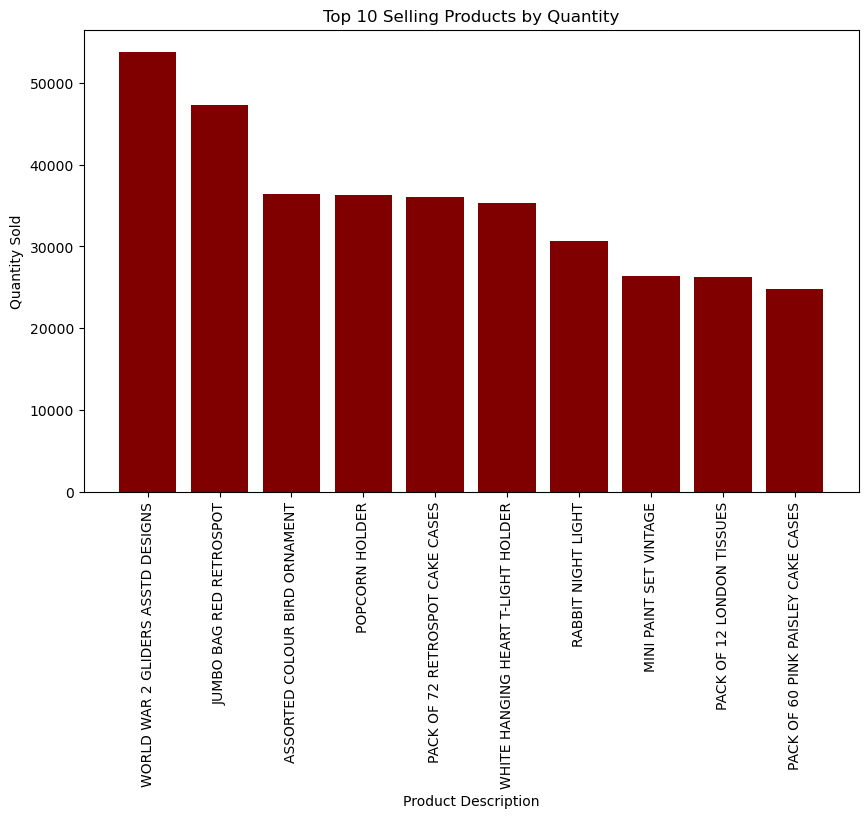

In [10]:
plt.figure(figsize=(10,6))
plt.bar(top_products['Description'], top_products['Quantity'], color ='maroon')
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.title("Top 10 Selling Products by Quantity")
plt.xticks(rotation=90)
plt.show()

In [11]:
#Top 10 Customers by Total Spend:
top_customers = df.pivot_table(index='CustomerID', values='UnitPrice', aggfunc='sum').reset_index()
top_customers = top_customers.nlargest(10, 'UnitPrice')
print(top_customers)


      CustomerID  UnitPrice
1300     14096.0   41376.33
2027     15098.0   40278.90
1895     14911.0   31060.66
328      12744.0   25108.89
2722     16029.0   24111.14
4042     17841.0   20333.18
330      12748.0   15115.60
154      12536.0   13255.22
338      12757.0    8035.24
1674     14606.0    7839.02


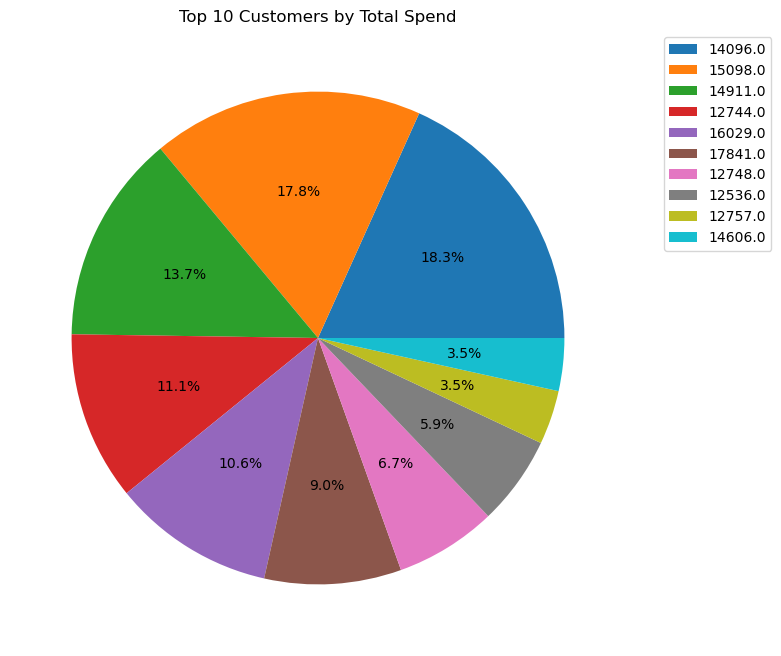

In [12]:
plt.figure(figsize=(10,8))
plt.pie(top_customers['UnitPrice'], autopct='%1.1f%%')
plt.title('Top 10 Customers by Total Spend')
plt.legend(top_customers['CustomerID'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
#Country-wise Sales
country_sales = df.pivot_table(index='Country', values='UnitPrice', aggfunc='sum').reset_index()
print(country_sales)

                 Country    UnitPrice
0              Australia     4054.750
1                Austria     1701.520
2                Bahrain       86.570
3                Belgium     7540.130
4                 Brazil      142.600
5                 Canada      910.580
6        Channel Islands     3738.550
7                 Cyprus     3920.070
8         Czech Republic       88.150
9                Denmark     1266.950
10                  EIRE    48447.190
11    European Community      294.050
12               Finland     3786.850
13                France    43031.990
14               Germany    37666.000
15                Greece      713.290
16             Hong Kong    12241.500
17               Iceland      481.210
18                Israel     1079.040
19                 Italy     3879.390
20                 Japan      814.860
21               Lebanon      242.440
22             Lithuania       99.440
23                 Malta      666.010
24           Netherlands     6492.550
25          

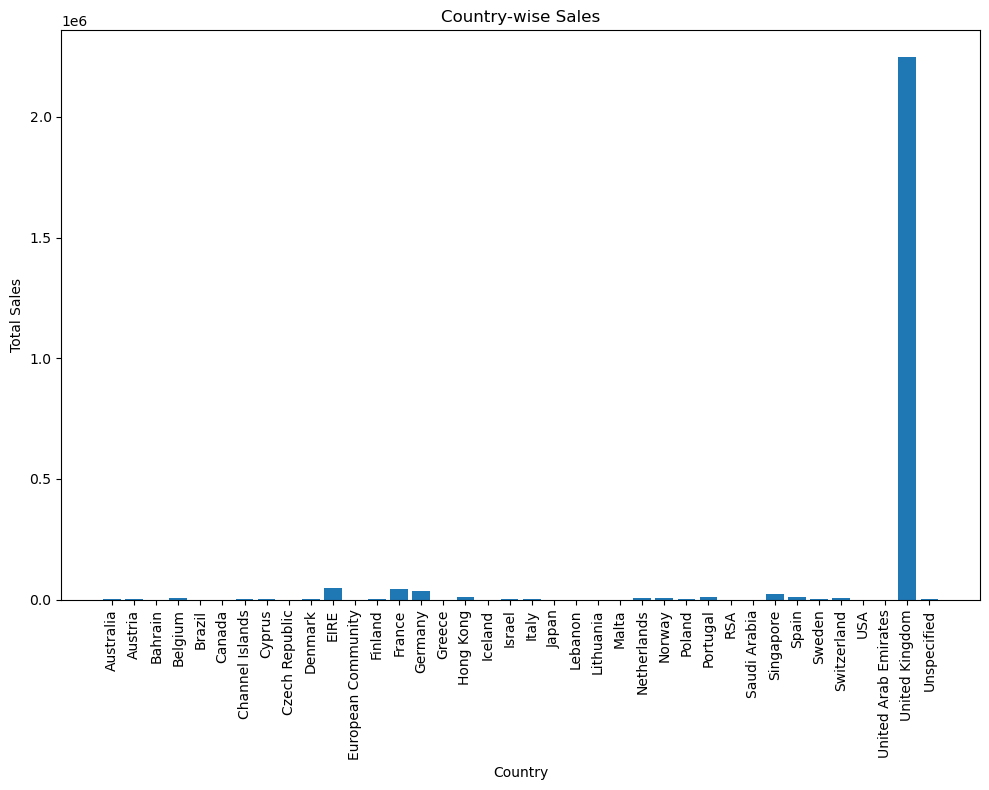

In [14]:
plt.figure(figsize=(10,8))
plt.bar(country_sales['Country'], country_sales['UnitPrice'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Country-wise Sales')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [15]:
#Globally Popular Items
global_popular_items = df.pivot_table(index='Description', values='Quantity', aggfunc='sum').reset_index()
global_popular_items = global_popular_items.nlargest(10, 'Quantity')
print(global_popular_items)

                             Description  Quantity
3998   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1855             JUMBO BAG RED RETROSPOT     47363
234        ASSORTED COLOUR BIRD ORNAMENT     36381
2728                      POPCORN HOLDER     36334
2386     PACK OF 72 RETROSPOT CAKE CASES     36039
3907  WHITE HANGING HEART T-LIGHT HOLDER     35317
2791                  RABBIT NIGHT LIGHT     30680
2150              MINI PAINT SET VINTAGE     26437
2352           PACK OF 12 LONDON TISSUES     26315
2384  PACK OF 60 PINK PAISLEY CAKE CASES     24753


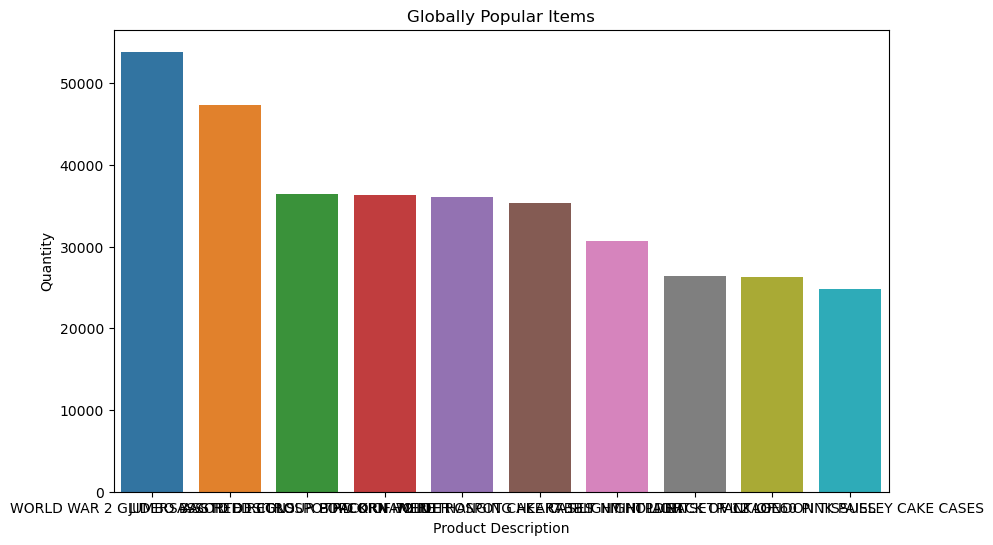

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Quantity', data=global_popular_items)
plt.title('Globally Popular Items')
plt.xlabel('Product Description')
plt.ylabel('Quantity')
plt.show()

In [17]:
#Country-wise Popular Items
country_popular_items = df.pivot_table(index=['Country', 'Description'], values='Quantity', aggfunc='sum').reset_index()
country_popular_items = country_popular_items.groupby('Country').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)
print(country_popular_items)

         Country                       Description  Quantity
0      Australia            MINI PAINT SET VINTAGE      2916
1      Australia                RABBIT NIGHT LIGHT      1884
2      Australia             RED  HARMONICA IN BOX      1704
3      Australia     RED TOADSTOOL LED NIGHT LIGHT      1344
4      Australia              DOLLY GIRL LUNCH BOX      1024
..           ...                               ...       ...
374  Unspecified   PACK OF 72 RETROSPOT CAKE CASES        37
375  Unspecified   60 CAKE CASES VINTAGE CHRISTMAS        36
376  Unspecified           BUBBLEGUM RING ASSORTED        36
377  Unspecified      PACK OF 6 LARGE FRUIT STRAWS        36
378  Unspecified  TRADITIONAL WOODEN SKIPPING ROPE        33

[379 rows x 3 columns]


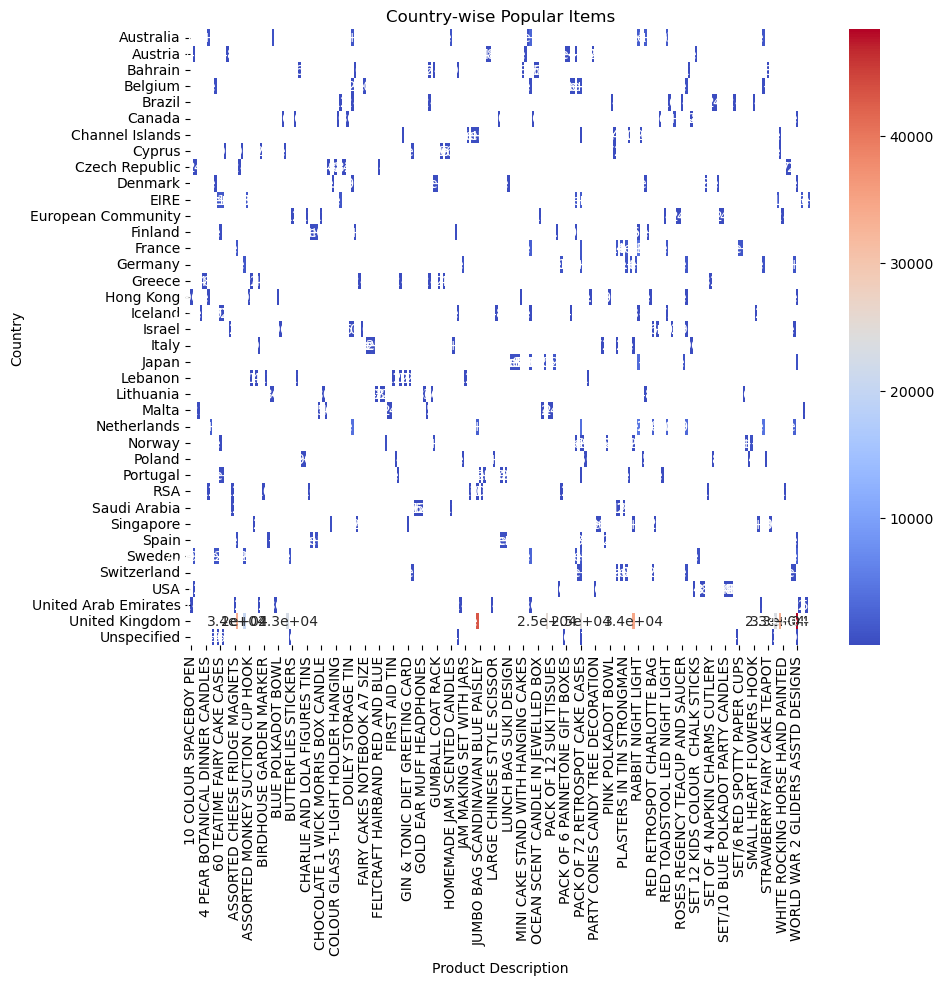

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(country_popular_items.pivot(index='Country', columns='Description', values='Quantity'), annot=True, cmap='coolwarm')
plt.title('Country-wise Popular Items')
plt.xlabel('Product Description')
plt.ylabel('Country')
plt.show()

In [19]:
#Monthly Popular Items
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
monthly_popular_items = df.pivot_table(index=['InvoiceMonth', 'Description'], values='Quantity', aggfunc='sum').reset_index()
monthly_popular_items = monthly_popular_items.groupby('InvoiceMonth').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)
print(monthly_popular_items)


     InvoiceMonth                         Description  Quantity
0               1  WHITE HANGING HEART T-LIGHT HOLDER      5530
1               1     PACK OF 72 RETROSPOT CAKE CASES      3409
2               1  FAIRY CAKE FLANNEL ASSORTED COLOUR      3246
3               1                  BROCADE RING PURSE      3181
4               1               HEART OF WICKER SMALL      2919
..            ...                                 ...       ...
115            12  WHITE HANGING HEART T-LIGHT HOLDER      4120
116            12       ASSORTED COLOUR BIRD ORNAMENT      3701
117            12         HAND WARMER BABUSHKA DESIGN      3481
118            12            BLACK RECORD COVER FRAME      3418
119            12     DISCO BALL CHRISTMAS DECORATION      3381

[120 rows x 3 columns]


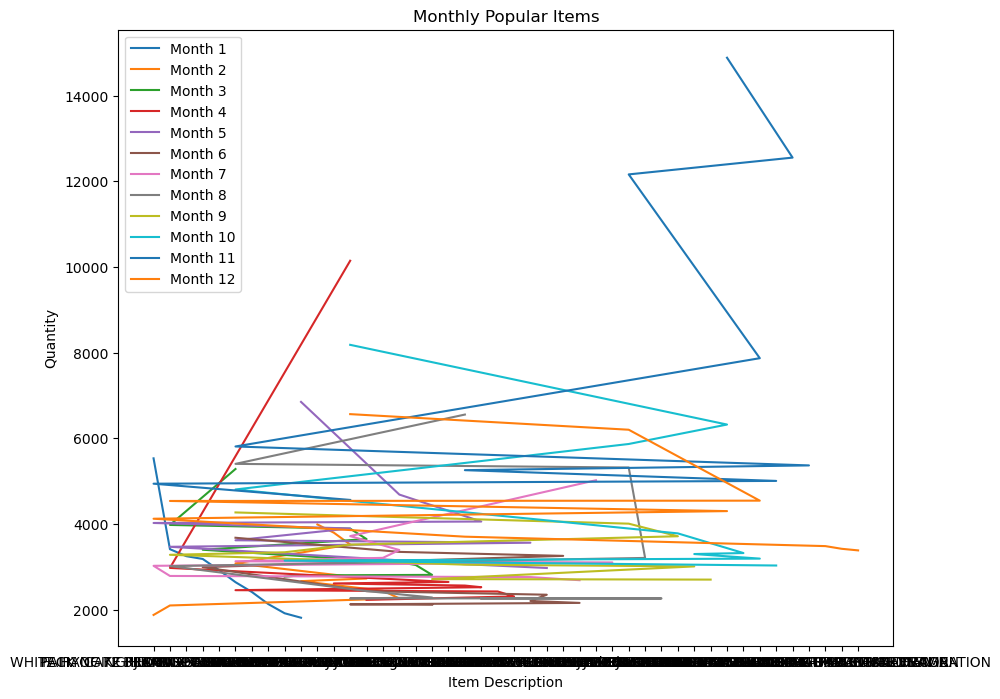

In [20]:
plt.figure(figsize=(10,8))
for month in monthly_popular_items['InvoiceMonth'].unique():
    month_data = monthly_popular_items[monthly_popular_items['InvoiceMonth'] == month]
    plt.plot(month_data['Description'], month_data['Quantity'], label=f'Month {month}')

plt.xlabel('Item Description')
plt.ylabel('Quantity')
plt.title('Monthly Popular Items')
plt.legend()
plt.show()

In [21]:
df = df[['CustomerID', 'StockCode', 'Description']] 
df = df.dropna()   
df['CustomerID'] = df['CustomerID'].astype(int)   
df['StockCode'] = df['StockCode'].astype(str)
matrix = df.pivot_table(index='CustomerID', columns='Description', aggfunc=len, fill_value=0)
cosine_sim = cosine_similarity(matrix)
def get_product_recommendations(customer_id, cosine_sim=cosine_sim, matrix=matrix):
    idx = matrix.index.get_loc(customer_id)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    customer_indices = [i[0] for i in sim_scores]
    recommendations = matrix.iloc[customer_indices, :].sum().sort_values(ascending=False).head(10)
    return recommendations
while True:
    try:
        customer_id = int(input("Enter a valid Customer ID from the dataset (or type -1 to exit): "))
        if customer_id == -1:
            print("Exiting the recommendation system.")
            break

        recommended_products = get_product_recommendations(customer_id)
        print("\nRecommended Products for Customer ID", customer_id)
        print(recommended_products)

        continue_choice = input("\nWould you like to enter another Customer ID? (yes/no): ").strip().lower()
        if continue_choice != 'yes':
            print("Thank you!")
            break

    except Exception as e:
        print(f"An error occurred: {e}. Please try again with a valid Customer ID.")

Enter a valid Customer ID from the dataset (or type -1 to exit): 17511

Recommended Products for Customer ID 17511
           Description                      
StockCode  JUMBO BAG RED RETROSPOT              99
           JUMBO SHOPPER VINTAGE RED PAISLEY    80
           JUMBO BAG PINK POLKADOT              73
           JUMBO BAG VINTAGE LEAF               71
           JUMBO STORAGE BAG SUKI               70
           JUMBO  BAG BAROQUE BLACK WHITE       67
           JUMBO BAG APPLES                     61
           JUMBO BAG ALPHABET                   59
           LUNCH BAG  BLACK SKULL.              56
           JUMBO STORAGE BAG SKULLS             56
dtype: int64

Would you like to enter another Customer ID? (yes/no): no
Thank you!
